# Classification of digits in handwritten images

## 1 - Init working environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os

2024-05-09 11:31:00.323442: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 11:31:01.355404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 2 - Retrieve and Load Data

In [2]:
x_train = pd.read_csv('./Data/train.csv')
x_test = pd.read_csv('./Data/test.csv')
submission = pd.read_csv('./Data/sample_submission.csv')

In [3]:
print('x_train:', x_train.shape)
print('x_test:', x_train.shape)
print('submission:', x_train.shape)

x_train: (42000, 785)
x_test: (42000, 785)
submission: (42000, 785)


In [4]:
print(x_test.columns)
print(x_train.columns)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


## 3 - Prepare data

### Get labels for training data

In [5]:
y_train = x_train.label
x_train = x_train.drop(['label'],axis=1)
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
print('Max values of pixels:', (x_train.describe()).loc['max'].max())

Max values of pixels: 255.0


### Reshape the images to 28x28 and normalize them

In [7]:
def reshape_images(data):
    data_flattened = data.to_numpy().flatten()
    new_data = data_flattened.reshape(data.shape[0], 28, 28, 1)
    new_data = new_data / 255
    return new_data

In [8]:
x_train = reshape_images(x_train)

In [9]:
x_test = reshape_images(x_test)

In [10]:
x_train.shape

(42000, 28, 28, 1)

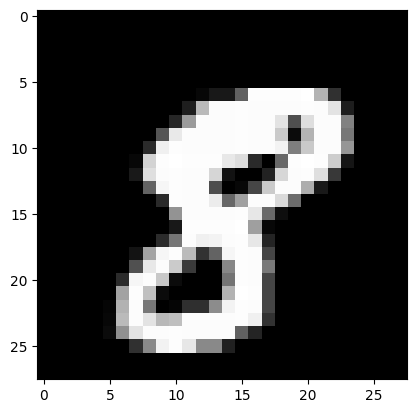

In [11]:
plt.imshow(x_train[10], cmap='gray')
plt.show()

## 4 - Build and Train model

We build the LeNet model architecture

In [1]:
def build_model(input):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(input, name='InputLayer'))
    
    model.add(keras.layers.Conv2D(6, (5,5), padding="same", activation='sigmoid'))
    model.add(keras.layers.AveragePooling2D((2,2), strides=2))

    model.add(keras.layers.Conv2D(16, (5,5),activation='sigmoid'))
    model.add(keras.layers.AveragePooling2D((2,2), strides=2))

    model.add(keras.layers.Flatten(name='OutputLayer'))
    
    model.add(keras.layers.Dense(120, activation='sigmoid'))
    model.add(keras.layers.Dense(84, activation='sigmoid'))

    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

We build the AlexNet model architecture

In [12]:
def build_model_v2(input):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(input, name='InputLayer'))

    model.add(keras.layers.Conv2D(96, (11,11), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    
    model.add(keras.layers.Conv2D(256, (5,5), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))

    model.add(keras.layers.Conv2D(384, (3,3), padding="same", activation='relu'))
    model.add(keras.layers.Conv2D(384, (3,3), padding="same", activation='relu'))
    model.add(keras.layers.Conv2D(256, (3,3), padding="same", activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))

    model.add(keras.layers.Flatten(name='OutputLayer'))
    
    model.add(keras.layers.Dense(4096, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(4096, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [75]:
model = build_model((28,28,1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Flatten)           │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model = build_model_v2((28,28,1))
model.summary()

2024-05-09 11:31:27.284227: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 11:31:27.505399: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 11:31:27.505582: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 18, 18, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Flatten)           │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,744,650 (94.39 MB)

 Trainable params: 24,744,650 (94.39 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, 
                    batch_size=500, 
                    epochs=80, 
                    verbose=1, validation_split=.2)

Epoch 1/80


I0000 00:00:1715254306.673931    4743 service.cc:145] XLA service 0x7f61040023d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715254306.673951    4743 service.cc:153]   StreamExecutor device (0): Quadro T2000 with Max-Q Design, Compute Capability 7.5
2024-05-09 11:31:46.734333: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-09 11:31:46.983490: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-05-09 11:31:51.208150: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 11:31:54.418307: W external/local_tsl/tsl/framework/bfc_allocator.cc:

 1/68 ━━━━━━━━━━━━━━━━━━━━ 21:52 20s/step - accuracy: 0.1040 - loss: 2.3024

I0000 00:00:1715254324.559502    4743 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.4252 - loss: 1.5590

2024-05-09 11:32:21.720646: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.45GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 11:32:22.361116: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.86GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 11:32:22.989064: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.45GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


68/68 ━━━━━━━━━━━━━━━━━━━━ 38s 281ms/step - accuracy: 0.4290 - loss: 1.5491 - val_accuracy: 0.9632 - val_loss: 0.1166
Epoch 2/80
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9697 - loss: 0.0962 - val_accuracy: 0.9786 - val_loss: 0.0696
Epoch 3/80
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9846 - val_loss: 0.0487
Epoch 4/80
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.9842 - val_loss: 0.0545
Epoch 5/80
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9920 - loss: 0.0275 - val_accuracy: 0.9854 - val_loss: 0.0558
Epoch 6/80
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9838 - val_loss: 0.0613
Epoch 7/80
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9877 - val_loss: 0.0460
Epoch 8/80
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.9945 - loss: 0.0191 - val_accuracy: 0.9877 - val

## 6 - Make predictions

In [15]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


## 7 - Export the predictions to csv

In [16]:
df_pred = pd.DataFrame(y_pred)
df_pred

,0
0,2
1,0
2,9
3,0
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [17]:
submission['Label'] = df_pred
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [18]:
submission.to_csv('submission.csv',index=False)